## Testing

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#### Test speed of functions calling attributes or creating variables

In [1]:
class TestClass:
    def __init__(self):
        self.AGENT_TEAMS = {
            0: 0,
            1: 0,
            2: 1,
            3: 1
        }

        self.CAPTURE_POSITIONS = {
            0: (1, 1),
            1: (8, 8)
        }

    def test_function1(self, agent_idx):
        """
        Create variables from attributes.
        """
        agent_team = self.AGENT_TEAMS[agent_idx]
        agent_capture_pos = self.CAPTURE_POSITIONS[agent_team]
        return agent_capture_pos

    def test_function2(self, agent_idx):
        """
        Mixture.
        """
        agent_team = self.AGENT_TEAMS[agent_idx]
        return self.CAPTURE_POSITIONS[agent_team]

    def test_function3(self, agent_idx):
        """
        Reference attributes.
        """
        return self.CAPTURE_POSITIONS[self.AGENT_TEAMS[agent_idx]]

In [2]:
tester = TestClass()

In [7]:
%%timeit
tester.test_function1(0)

216 ns ± 6.83 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [8]:
%%timeit
tester.test_function2(0)

203 ns ± 3.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [9]:
%%timeit
tester.test_function3(0)

200 ns ± 18.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


#### Testing retrieving stuff from tuples

In [30]:
mini_batch = [(1, 2, 3, 4, 5), 
              (1, 2, 3, 4, 5), 
              (1, 2, 3, 4, 5)]

In [19]:
%%timeit

s = [s1 for (s1, a, r, s2, d) in mini_batch]
a = [a for (s1, a, r, s2, d) in mini_batch]
r = [r for (s1, a, r, s2, d) in mini_batch]
s2 = [s2 for (s1, a, r, s2, d) in mini_batch]
d = [d for (s1, a, r, s2, d) in mini_batch]

1.65 µs ± 45.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [20]:
%%timeit

s = [s1 for (s1, _, _, _, _) in mini_batch]
a = [a for (_, a, _, _, _) in mini_batch]
r = [r for (_, _, r, _, _) in mini_batch]
s2 = [s2 for (_, _, _, s2, _) in mini_batch]
d = [d for (_, _, _, _, d) in mini_batch]

1.62 µs ± 99.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [31]:
%%timeit

s = [x[0] for x in mini_batch]
a = [x[1] for x in mini_batch]
r = [x[2] for x in mini_batch]
s2 = [x[3] for x in mini_batch]
d = [x[4] for x in mini_batch]

1.56 µs ± 87.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


#### Retrieving elements from tuples 

In [34]:
mini_batch = [((10, 15), 2, 3, 4, 5), 
              ((20, 25), 2, 3, 4, 5), 
              ((30, 35), 2, 3, 4, 5)]

In [37]:
s1 = [x[0][0] for x in mini_batch]
s2 = [x[0][1] for x in mini_batch]

print(s1)
print(s2)

[10, 20, 30]
[15, 25, 35]


#### List comprehension vs inserting values into array

In [23]:
idx = 2

In [28]:
%%timeit

agent_turn = np.array([1 if i==idx else 0 for i in range(4)], dtype=np.int8)

1.15 µs ± 21.4 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [29]:
%%timeit

agent_turn = np.array([0, 0, 0, 0], dtype=np.int8)
agent_turn[idx] = 1

692 ns ± 14.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


#### Does a while loop break out immediately when criteria met?

In [3]:
done = False

while not done:
    print('test 1')
    print('test 2')
    done = True
    print('test 3')
    print('test 4')


test 1
test 2
test 3
test 4


#### Flattening a numpy array

In [18]:
arr = np.array([[[11]]])
arr

array([[[11]]])

In [23]:
%%timeit
val = arr.flatten()

609 ns ± 10.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [24]:
%%timeit
val = np.squeeze(arr)

868 ns ± 35.9 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [25]:
%%timeit
val = arr.item()

78 ns ± 2.31 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


#### Generate a cumulative sum

In [4]:
arr = [0, 1, 1, 1, 0, 0, 3, 0, 0, 1, 1]

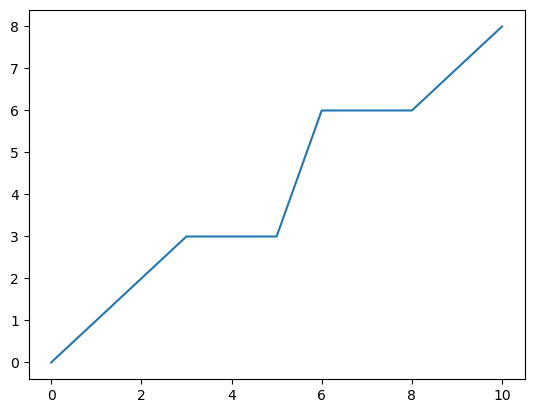

In [5]:
plt.plot(np.cumsum(arr))
plt.show()